In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams

C:\Users\Ali Haider\anaconda33\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df=pd.read_csv('ReplicatedAcousticFeatures-ParkinsonDatabase.csv')

In [3]:
df.head()

,ID,Recording,Status,Gender,Jitter_rel,Jitter_abs,Jitter_RAP,Jitter_PPQ,Shim_loc,Shim_dB,...,Delta3,Delta4,Delta5,Delta6,Delta7,Delta8,Delta9,Delta10,Delta11,Delta12
0,CONT-01,1,0,1,0.25546,0.000015,0.001467,0.001673,0.030256,0.26313,...,1.407701,1.417218,1.380352,1.420670,1.451240,1.440295,1.403678,1.405495,1.416705,1.354610
1,CONT-01,2,0,1,0.36964,0.000022,0.001932,0.002245,0.023146,0.20217,...,1.331232,1.227338,1.213377,1.352739,1.354242,1.365692,1.322870,1.314549,1.318999,1.323508
2,CONT-01,3,0,1,0.23514,0.000013,0.001353,0.001546,0.019338,0.16710,...,1.412304,1.324674,1.276088,1.429634,1.455996,1.368882,1.438053,1.388910,1.305469,1.305402
3,CONT-02,1,0,0,0.29320,0.000017,0.001105,0.001444,0.024716,0.20892,...,1.501200,1.534170,1.323993,1.496442,1.472926,1.643177,1.551286,1.638346,1.604008,1.621456
4,CONT-02,2,0,0,0.23075,0.000015,0.001073,0.001404,0.013119,0.11607,...,1.508468,1.334511,1.610694,1.685021,1.417614,1.574895,1.640088,1.533666,1.297536,1.382023


In [4]:
df.tail()

,ID,Recording,Status,Gender,Jitter_rel,Jitter_abs,Jitter_RAP,Jitter_PPQ,Shim_loc,Shim_dB,...,Delta3,Delta4,Delta5,Delta6,Delta7,Delta8,Delta9,Delta10,Delta11,Delta12
235,PARK-39,2,1,0,0.57585,0.000037,0.003701,0.005149,0.016868,0.14928,...,1.116409,1.104511,1.099866,1.080320,1.154057,1.117423,1.167076,1.132436,1.107824,1.109144
236,PARK-39,3,1,0,0.23322,0.000015,0.001270,0.001497,0.017923,0.16720,...,1.107477,1.083859,1.101819,1.114161,1.090095,1.140705,1.126667,1.158444,1.096073,1.141835
237,PARK-40,1,1,0,0.26862,0.000022,0.001354,0.001615,0.028040,0.24182,...,1.335189,1.385580,1.281551,1.367171,1.319055,1.367095,1.343193,1.374330,1.383364,1.456409
238,PARK-40,2,1,0,0.45376,0.000037,0.002724,0.002258,0.064605,0.58002,...,1.327629,1.349928,1.461323,1.350599,1.346363,1.415338,1.361937,1.331923,1.423062,1.307353
239,PARK-40,3,1,0,0.34706,0.000028,0.001746,0.002060,0.019914,0.17087,...,1.440003,1.327946,1.531764,1.471198,1.445675,1.415942,1.304214,1.395653,1.315691,1.422534


In [5]:
df.describe()

,Recording,Status,Gender,Jitter_rel,Jitter_abs,Jitter_RAP,Jitter_PPQ,Shim_loc,Shim_dB,Shim_APQ3,...,Delta3,Delta4,Delta5,Delta6,Delta7,Delta8,Delta9,Delta10,Delta11,Delta12
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,...,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,2.000000,0.500000,0.400000,0.583987,0.000044,0.003172,0.003532,0.038428,0.336832,0.021499,...,1.343238,1.348914,1.337717,1.341786,1.340895,1.343978,1.341472,1.331433,1.346381,1.346144
std,0.818203,0.501045,0.490922,0.535769,0.000045,0.003373,0.004449,0.023213,0.205905,0.013787,...,0.198174,0.212008,0.204978,0.209407,0.213689,0.211364,0.204085,0.211297,0.221484,0.208819
min,1.000000,0.000000,0.000000,0.148010,0.000007,0.000678,0.001036,0.007444,0.064989,0.003344,...,0.766458,0.840133,0.741690,0.759689,0.764649,0.762798,0.811942,0.777012,0.643132,0.748411
25%,1.000000,0.000000,0.000000,0.298260,0.000019,0.001551,0.001867,0.024336,0.211785,0.012909,...,1.208624,1.221101,1.197868,1.194186,1.194138,1.191881,1.189515,1.192397,1.202525,1.206559
50%,2.000000,0.500000,0.000000,0.481455,0.000035,0.002337,0.002870,0.032960,0.287885,0.018571,...,1.351015,1.342237,1.337233,1.338437,1.344416,1.335517,1.349243,1.333345,1.347297,1.331212
75%,3.000000,1.000000,1.000000,0.681685,0.000056,0.003678,0.003991,0.045475,0.399860,0.025784,...,1.488878,1.470287,1.485597,1.496845,1.490389,1.495355,1.475330,1.472589,1.506674,1.475235
max,3.000000,1.000000,1.000000,6.838200,0.000550,0.043843,0.065199,0.192600,1.747600,0.113240,...,1.860588,2.038241,1.785984,1.988090,1.872799,1.920131,1.943331,1.949679,1.918392,1.930103


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 48 columns):
ID            240 non-null object
Recording     240 non-null int64
Status        240 non-null int64
Gender        240 non-null int64
Jitter_rel    240 non-null float64
Jitter_abs    240 non-null float64
Jitter_RAP    240 non-null float64
Jitter_PPQ    240 non-null float64
Shim_loc      240 non-null float64
Shim_dB       240 non-null float64
Shim_APQ3     240 non-null float64
Shim_APQ5     240 non-null float64
Shi_APQ11     240 non-null float64
HNR05         240 non-null float64
HNR15         240 non-null float64
HNR25         240 non-null float64
HNR35         240 non-null float64
HNR38         240 non-null float64
RPDE          240 non-null float64
DFA           240 non-null float64
PPE           240 non-null float64
GNE           240 non-null float64
MFCC0         240 non-null float64
MFCC1         240 non-null float64
MFCC2         240 non-null float64
MFCC3         240 non-null 

In [7]:
df.count()

ID            240
Recording     240
Status        240
Gender        240
Jitter_rel    240
Jitter_abs    240
Jitter_RAP    240
Jitter_PPQ    240
Shim_loc      240
Shim_dB       240
Shim_APQ3     240
Shim_APQ5     240
Shi_APQ11     240
HNR05         240
HNR15         240
HNR25         240
HNR35         240
HNR38         240
RPDE          240
DFA           240
PPE           240
GNE           240
MFCC0         240
MFCC1         240
MFCC2         240
MFCC3         240
MFCC4         240
MFCC5         240
MFCC6         240
MFCC7         240
MFCC8         240
MFCC9         240
MFCC10        240
MFCC11        240
MFCC12        240
Delta0        240
Delta1        240
Delta2        240
Delta3        240
Delta4        240
Delta5        240
Delta6        240
Delta7        240
Delta8        240
Delta9        240
Delta10       240
Delta11       240
Delta12       240
dtype: int64

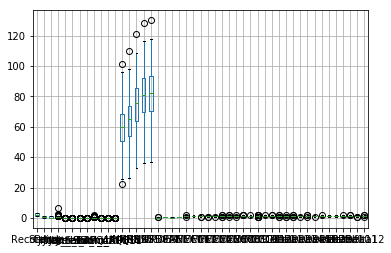

In [8]:
df.boxplot()

C:\Users\Ali Haider\anaconda33\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


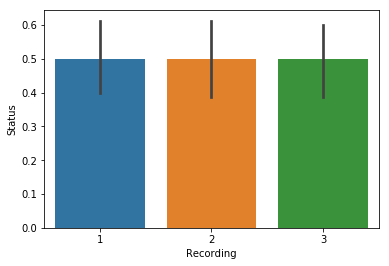

In [3]:
sns.barplot(data= df, x='Recording', y='Status')

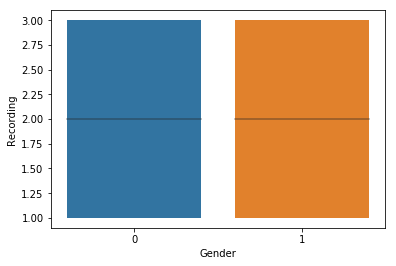

In [5]:
sns.boxenplot(x='Gender', y='Recording', data=df)

C:\Users\Ali Haider\anaconda33\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


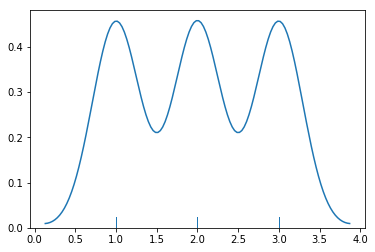

In [6]:
sns.distplot(df[['Recording']], hist=False, rug=True )

C:\Users\Ali Haider\anaconda33\lib\site-packages\seaborn\categorical.py:2612: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


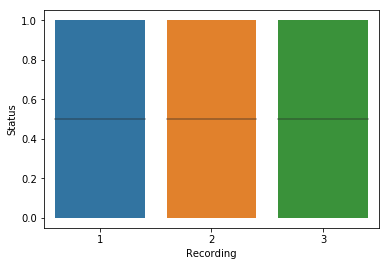

In [7]:
sns.lvplot(data=df, x='Recording', y='Status')

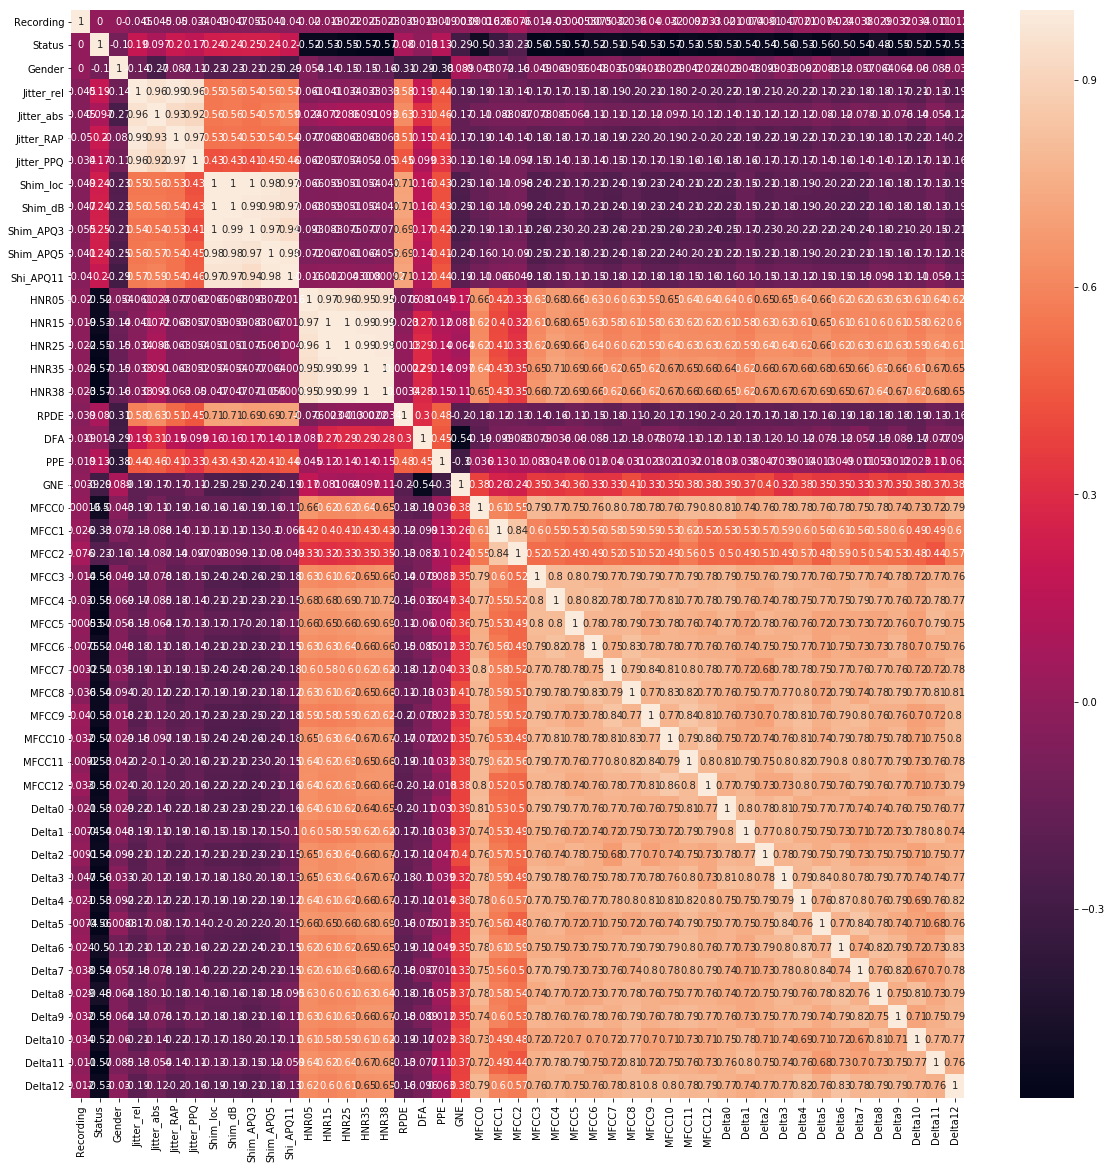

In [9]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(),annot=True)

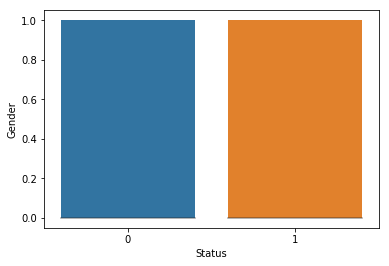

In [3]:
sns.boxenplot(x='Status', y='Gender', data=df)

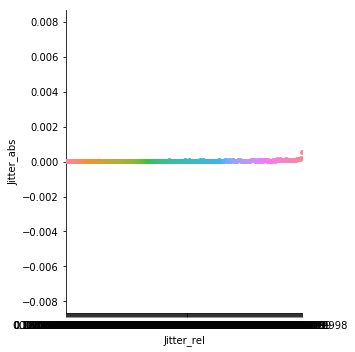

In [4]:
sns.catplot(data=df, x='Jitter_rel' , y='Jitter_abs')

In [3]:
df.drop(['ID'],inplace=True, axis=1)

In [4]:
df.fillna(df.mean(), inplace=True)

In [5]:
y = df['Status']

In [6]:
X = df.drop(['Status'],axis=1)

In [7]:
df.isnull().any()

Recording     False
Status        False
Gender        False
Jitter_rel    False
Jitter_abs    False
Jitter_RAP    False
Jitter_PPQ    False
Shim_loc      False
Shim_dB       False
Shim_APQ3     False
Shim_APQ5     False
Shi_APQ11     False
HNR05         False
HNR15         False
HNR25         False
HNR35         False
HNR38         False
RPDE          False
DFA           False
PPE           False
GNE           False
MFCC0         False
MFCC1         False
MFCC2         False
MFCC3         False
MFCC4         False
MFCC5         False
MFCC6         False
MFCC7         False
MFCC8         False
MFCC9         False
MFCC10        False
MFCC11        False
MFCC12        False
Delta0        False
Delta1        False
Delta2        False
Delta3        False
Delta4        False
Delta5        False
Delta6        False
Delta7        False
Delta8        False
Delta9        False
Delta10       False
Delta11       False
Delta12       False
dtype: bool

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    BernoulliNB(),
    MultinomialNB(),
    LogisticRegression(),
    LinearDiscriminantAnalysis()]

In [10]:
log_cols=["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    print("."*70)
    print(name)
    
    print('Predicted values')
    train_predictions = clf.predict(X_test)
    print(train_predictions)
    acc = accuracy_score(y_test, train_predictions)
    cm=confusion_matrix(y_test,train_predictions)
    print('Confusion Matrix', cm)
    print("Accuracy: {:.4%}".format(acc))
    log_entry = pd.DataFrame([[name, acc * 100]], columns=log_cols)
    log = log.append(log_entry)



......................................................................
KNeighborsClassifier
Predicted values
[0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0
 1 0 0 1 1 1 0 0 1 0 0]
Confusion Matrix [[21  5]
 [ 7 15]]
Accuracy: 75.0000%
......................................................................
SVC
Predicted values
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1]
Confusion Matrix [[ 0 26]
 [ 0 22]]
Accuracy: 45.8333%
......................................................................
DecisionTreeClassifier
Predicted values
[0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 1 0]
Confusion Matrix [[20  6]
 [ 9 13]]
Accuracy: 68.7500%
......................................................................
RandomForestClassifier
Predicted values
[0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1
 1 0 0 1 0 1 0 0 0 0 0]
Confusion Matrix

In [18]:
log

,Classifier,Accuracy
0,KNeighborsClassifier,75.000000
0,SVC,45.833333
0,DecisionTreeClassifier,62.500000
0,RandomForestClassifier,87.500000
0,AdaBoostClassifier,79.166667
0,GradientBoostingClassifier,83.333333
0,GaussianNB,83.333333
0,BernoulliNB,56.250000
0,MultinomialNB,75.000000
0,LogisticRegression,85.416667
